# Loading and Plotting the Climate dataset


This notebook demonstrates basic loading and plotting of the climate dataset used in the Ginsbourger-Franke collaboration.


### Data
There are three types of datasets involved:
* **Instrumental**

   This dataset includes surface temperature anomalies deduced from observational data. (_see https://crudata.uea.ac.uk/cru/data/temperature/)_
   
   Surface temperature anomalies are relative to a 1961-1990 reference period.
   
   
* **Ensemble Members**

   This dataset contains simulations from the CCC400 model. There are 30 different simulations (ensemble members).
   
   
* **Ensemble Means**

   This dataset is a mean across ensemble members of the preceding dataset.
   
   
 In the following we will explore the different datasets and demonstrate how they can be easily loaded and plotted using the functionalities provided by the **climate** package *(https://github.com/CedricTravelletti/Climate)*

#### Loading:
The 3 datasets may be easily loaded by specifiying the root folder where the data is stored (*see preprocessing*). The number of different ensemble members to load should alos be secified.


We here load the instrumental data, the mean and the first 6 ensemble members (to keep computations light).

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

from climate.utils import load_dataset
base_folder = "/home/cedric/PHD/Dev/Climate/Data/"
TOT_ENSEMBLES_NUMBER = 6 # Only consider the first 6 ensemble members to keep it light.
dataset_members, dataset_mean, dataset_instrumental = load_dataset(base_folder, TOT_ENSEMBLES_NUMBER)

/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_1/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_2/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_3/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_4/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_5/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_6/


The datasets are loaded into **xarray** arrays (*see http://xarray.pydata.org/en/stable/index.html*).


This library provides high-level dataset routines. One can get a summary of a dataset by just calling its name:

In [4]:
dataset_members

<xarray.Dataset>
Dimensions:                              (latitude: 96, longitude: 192, member_nr: 6, pressure_level_gph: 2, pressure_level_wind: 2, time: 132)
Coordinates:
  * longitude                            (longitude) float64 0.0 1.875 ... 358.1
  * latitude                             (latitude) float64 88.57 ... -88.57
  * time                                 (time) object 1993-01-16 00:00:00 .....
  * pressure_level_gph                   (pressure_level_gph) float64 500.0 1...
  * pressure_level_wind                  (pressure_level_wind) float64 850.0 ...
  * member_nr                            (member_nr) int64 1 2 3 4 5 6
Data variables:
    air_temperature                      (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
    total precipitation                  (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
    air_pressure_at_sea_level            (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
    geopotential_height                  (member_nr, time, pressure_level_gph, latitude, longitude) float32 dask.array<chunksize=(1, 12, 2, 96, 192), meta=np.ndarray>
    eastward_wind                        (member_nr, time, pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(1, 12, 2, 96, 192), meta=np.ndarray>
    northward_wind                       (member_nr, time, pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(1, 12, 2, 96, 192), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
    blocks                               (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
    cycfreq                              (member_nr, time, latitude, longitude) float32 dask.array<chunksize=(1, 12, 96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

## Subsetting

One can index/subset a dataset along any of its dimension using `sel` together with the name of the dimension to index.

We here select the first simulation/ensemble member:

In [6]:
dataset_members.sel(member_nr=1)

<xarray.Dataset>
Dimensions:                              (latitude: 96, longitude: 192, pressure_level_gph: 2, pressure_level_wind: 2, time: 132)
Coordinates:
  * longitude                            (longitude) float64 0.0 1.875 ... 358.1
  * latitude                             (latitude) float64 88.57 ... -88.57
  * time                                 (time) object 1993-01-16 00:00:00 .....
  * pressure_level_gph                   (pressure_level_gph) float64 500.0 1...
  * pressure_level_wind                  (pressure_level_wind) float64 850.0 ...
    member_nr                            int64 1
Data variables:
    air_temperature                      (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
    total precipitation                  (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
    air_pressure_at_sea_level            (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
    geopotential_height                  (time, pressure_level_gph, latitude, longitude) float32 dask.array<chunksize=(12, 2, 96, 192), meta=np.ndarray>
    eastward_wind                        (time, pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(12, 2, 96, 192), meta=np.ndarray>
    northward_wind                       (time, pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(12, 2, 96, 192), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
    blocks                               (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
    cycfreq                              (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

## Timestamps

In order to avoid having to manually specify times, we extract timestamps once and for all.

In [14]:
timestamps = dataset_members.time
timestamps[1]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1993, 2, 16, 0, 0, 0, 0), dtype=object)
Coordinates:
    time     object 1993-02-16 00:00:00
Attributes:
    long_name:  time

In [15]:
timestamps[2]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1993, 3, 16, 0, 0, 0, 0), dtype=object)
Coordinates:
    time     object 1993-03-16 00:00:00
Attributes:
    long_name:  time

We see that we have simulated data month by month.

We can use the timestamps array for indexing. For example, if one wants the data of simulation number 3 for March 1993:

In [16]:
dataset_members.sel(member_nr=1, time=timestamps[2])

<xarray.Dataset>
Dimensions:                              (latitude: 96, longitude: 192, pressure_level_gph: 2, pressure_level_wind: 2)
Coordinates:
  * longitude                            (longitude) float64 0.0 1.875 ... 358.1
  * latitude                             (latitude) float64 88.57 ... -88.57
    time                                 object 1993-03-16 00:00:00
  * pressure_level_gph                   (pressure_level_gph) float64 500.0 1...
  * pressure_level_wind                  (pressure_level_wind) float64 850.0 ...
    member_nr                            int64 1
Data variables:
    air_temperature                      (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
    total precipitation                  (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
    air_pressure_at_sea_level            (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
    geopotential_height                  (pressure_level_gph, latitude, longitude) float32 dask.array<chunksize=(2, 96, 192), meta=np.ndarray>
    eastward_wind                        (pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(2, 96, 192), meta=np.ndarray>
    northward_wind                       (pressure_level_wind, latitude, longitude) float32 dask.array<chunksize=(2, 96, 192), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
    blocks                               (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
    cycfreq                              (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

## Acessing Dataset Variables

The different variables in a dataset may be accessed using the syntax: `dataset_name.variable_name`

Note that subsetting operations (see above) also return datasets, so their variables can also be accessed in the same way.


For example, if we want to get the air temperature field on March 1993 for the 3rd simulation ensemble:

In [17]:
dataset_members.sel(member_nr=1, time=timestamps[2]).air_temperature

<xarray.DataArray 'air_temperature' (latitude: 96, longitude: 192)>
dask.array<getitem, shape=(96, 192), dtype=float32, chunksize=(96, 192), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * latitude   (latitude) float64 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
    time       object 1993-03-16 00:00:00
    member_nr  int64 1
Attributes:
    units:         K
    long_name:     air temperature at 2m
    cell_methods:  time: mean (interval: 1 month)

## Plotting

Any variable may be plotted by calling its `plot` method:

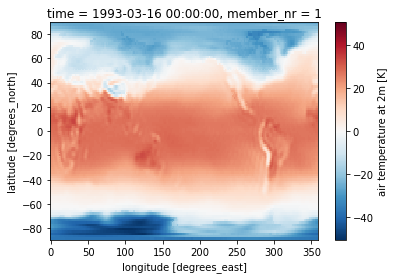

In [19]:
dataset_members.sel(member_nr=1, time=timestamps[2]).air_temperature.plot()

One can also group several plot corresponding to different values of a coordinate. To do this, one should specify the name of the dimension along which to produce the different plots.


For example: we can compare the air temperature in March 1993 across the 6 ensemble members:

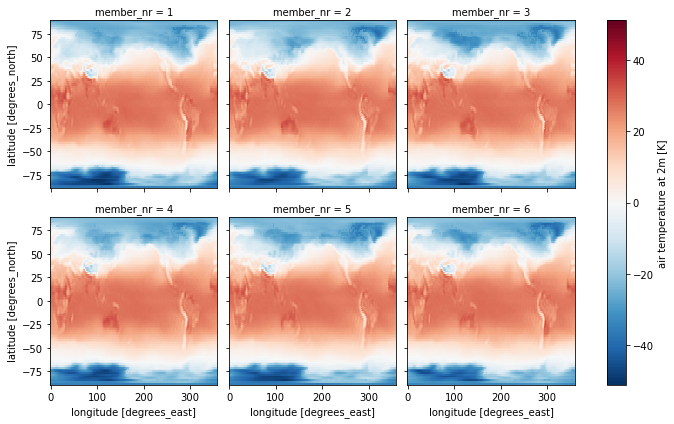

In [26]:
dataset_members.air_temperature.sel(time=timestamps[2]).plot(
    col='member_nr', col_wrap=3)

**ISN'T THAT POWERFUL?!?!?!?**